# Exploratory-Data-Analysis-and-Prediction-on-Diabetes-Dataset-using-R

This project first conducts Exploratory Data Analysis and data visualization on the diabetes dataset and then predict the disbetes using machine learning.


## Dataset
Diabetes data can be downloaded from
http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets?CGISESSID=10713f6d891653ddcbb7ddbdd9cffb79
You 



### Data Analysis
I will perform Exploratory Data Analysis using Descriptive statistics and Data visualization. In Descriptive statistics
I'll find attribute type, class distribution, mean, stadard deviation, median, quartile, Skewness, correlation. And I'll 
perform visualization through Histogram plot,Density plot,Box and Whisker plot,Bar plot,Missing data map,Pair-wise correlation 
plot.


#### Prediction on Diabetes
And at last I'll compare the performance for the following classifiers:
Logistic Regression
Support Vector Machine (SVM)
random Forest

In [12]:
# Load libraries
library(randomForest)
library(caret)



randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [13]:
# load the data
datasetRaw = read.csv("diabetes_data.csv")
print(head(datasetRaw))



    id chol stab.glu hdl ratio glyhb   location age gender height weight  frame
1 1000  203       82  56   3.6  4.31 Buckingham  46 female     62    121 medium
2 1001  165       97  24   6.9  4.44 Buckingham  29 female     64    218  large
3 1002  228       92  37   6.2  4.64 Buckingham  58 female     61    256  large
4 1003   78       93  12   6.5  4.63 Buckingham  67   male     67    119  large
5 1005  249       90  28   8.9  7.72 Buckingham  64   male     68    183 medium
6 1008  248       94  69   3.6  4.81 Buckingham  34   male     71    190  large
  bp.1s bp.1d bp.2s bp.2d waist hip time.ppn
1   118    59    NA    NA    29  38      720
2   112    68    NA    NA    46  48      360
3   190    92   185    92    49  57      180
4   110    50    NA    NA    33  38      480
5   138    80    NA    NA    44  41      300
6   132    86    NA    NA    36  42      195


In [14]:
# clean the data
numColumns = dim(datasetRaw)[2]
vector_NAs = rep(0, numColumns)               
for (i in 1:numColumns) {
  vector_NAs[i] = sum(is.na(datasetRaw[,i]))
  
}
print("The missing values in each column:")
print(vector_NAs)



[1] "The missing values in each column:"
 [1]   0   1   0   1   1  13   0   0   0   5   1   0   5   5 262 262   2   2   3


In [15]:
# delete columns 15 and 16 due to many missing values
# delete column 1 (id), column 7 (location) because they contain no useful information
dataset = datasetRaw[,-c(1,7,15,16)]
print(dim(dataset))



[1] 403  15


In [16]:
# remove the row with missing values
row.has.na <- apply(dataset, 1, function(x){any(is.na(x))})
dataset = dataset[!row.has.na,]
print(dim(dataset))
print(head(dataset))



[1] 375  15
  chol stab.glu hdl ratio glyhb age gender height weight  frame bp.1s bp.1d
1  203       82  56   3.6  4.31  46 female     62    121 medium   118    59
2  165       97  24   6.9  4.44  29 female     64    218  large   112    68
3  228       92  37   6.2  4.64  58 female     61    256  large   190    92
4   78       93  12   6.5  4.63  67   male     67    119  large   110    50
5  249       90  28   8.9  7.72  64   male     68    183 medium   138    80
6  248       94  69   3.6  4.81  34   male     71    190  large   132    86
  waist hip time.ppn
1    29  38      720
2    46  48      360
3    49  57      180
4    33  38      480
5    44  41      300
6    36  42      195


In [17]:
# encode the class label (column 5): Glycosolated hemoglobin  > 7.0 is taken as a positive diagnosis of diabetes.
dataset[,5] = ifelse(dataset[,5] >= 7.0, 1, 0)
dataset[,5] = factor(dataset[,5]) # class label must be factor type

# encode the categorical data (column-7 gender)
dataset[,7] = ifelse(dataset[,7] == "female", 0, 1)
dataset[,7] = factor(dataset[,7])
# encode the categorical data (column-10 frame)
dataset[,10] = ifelse(dataset[,10] == "small", 0, ifelse(dataset[,10] == "medium", 1,2) )
dataset[,10] = factor(dataset[,10])


In [18]:

# Descriptive statistics %%%%%%%
# display the first 20 rows
print(head(dataset, n=20))


   chol stab.glu hdl ratio glyhb age gender height weight frame bp.1s bp.1d
1   203       82  56   3.6     0  46      0     62    121     1   118    59
2   165       97  24   6.9     0  29      0     64    218     2   112    68
3   228       92  37   6.2     0  58      0     61    256     2   190    92
4    78       93  12   6.5     0  67      1     67    119     2   110    50
5   249       90  28   8.9     1  64      1     68    183     1   138    80
6   248       94  69   3.6     0  34      1     71    190     2   132    86
7   195       92  41   4.8     0  30      1     69    191     1   161   112
9   177       87  49   3.6     0  45      1     69    166     2   160    80
10  263       89  40   6.6     0  55      0     63    202     0   108    72
11  242       82  54   4.5     0  60      0     65    156     1   130    90
12  215      128  34   6.3     0  38      0     58    195     1   102    68
13  238       75  36   6.6     0  27      0     60    170     1   130    80
15  191     

In [19]:
# display the dimensions of the dataset
print(dim(dataset))


[1] 375  15


In [20]:
# list types for each attribute
print(sapply(dataset,class))


     chol  stab.glu       hdl     ratio     glyhb       age    gender    height 
"integer" "integer" "integer" "numeric"  "factor" "integer"  "factor" "integer" 
   weight     frame     bp.1s     bp.1d     waist       hip  time.ppn 
"integer"  "factor" "integer" "integer" "integer" "integer" "integer" 


In [21]:
# distribution of the class labels
y = dataset$glyhb
print(cbind(freq=table(y),percentage=prop.table(table(y))*100))
print(table(y))
print(table(y)/length(y))


  freq percentage
0  317   84.53333
1   58   15.46667
y
  0   1 
317  58 
y
        0         1 
0.8453333 0.1546667 


In [22]:
# summarize the dataset
print(summary(dataset))


      chol          stab.glu          hdl             ratio        glyhb  
 Min.   : 78.0   Min.   : 48.0   Min.   : 12.00   Min.   : 1.500   0:317  
 1st Qu.:179.0   1st Qu.: 81.0   1st Qu.: 38.00   1st Qu.: 3.200   1: 58  
 Median :204.0   Median : 90.0   Median : 46.00   Median : 4.200          
 Mean   :207.6   Mean   :107.6   Mean   : 50.43   Mean   : 4.525          
 3rd Qu.:229.5   3rd Qu.:108.5   3rd Qu.: 59.00   3rd Qu.: 5.400          
 Max.   :443.0   Max.   :385.0   Max.   :120.00   Max.   :19.300          
      age        gender      height       weight      frame       bp.1s      
 Min.   :19.00   0:220   Min.   :52   Min.   : 99.0   0: 98   Min.   : 90.0  
 1st Qu.:34.00   1:155   1st Qu.:63   1st Qu.:151.0   1:172   1st Qu.:121.5  
 Median :45.00           Median :66   Median :174.0   2:105   Median :136.0  
 Mean   :46.98           Mean   :66   Mean   :177.9           Mean   :137.5  
 3rd Qu.:60.00           3rd Qu.:69   3rd Qu.:200.0           3rd Qu.:148.0  
 Max.  

In [23]:
# Standard Deviations for the non-categorical columns
std=sapply(dataset[,-c(5,7,10)],sd) 
print('The standard deviations are:')
print(std)


[1] "The standard deviations are:"
      chol   stab.glu        hdl      ratio        age     height     weight 
 44.700780  54.082496  17.444346   1.755499  16.661203   3.915210  40.568940 
     bp.1s      bp.1d      waist        hip   time.ppn 
 23.178154  13.544167   5.777105   5.642679 309.056806 


In [24]:
# Skewness
#The further the distribution of the skew value from zero, 
# the larger the skew to the left (negative skew value) or right (positive skew value).
library(e1071) # the library for skewness
skew=apply(dataset[,-c(5,7,10)], 2, skewness) 
print(skew)


      chol   stab.glu        hdl      ratio        age     height     weight 
0.97739823 2.69790949 1.21275829 2.24132546 0.30061280 0.02678693 0.74880775 
     bp.1s      bp.1d      waist        hip   time.ppn 
1.05634395 0.23310577 0.47060516 0.80724954 1.28077802 


In [25]:
# Correlations
correlations=cor(dataset[,-c(5,7,10)])
print(correlations)


                  chol    stab.glu         hdl       ratio         age
chol      1.0000000000  0.17605760  0.18918622  0.47685119  0.25807515
stab.glu  0.1760576046  1.00000000 -0.15845068  0.29353513  0.28820616
hdl       0.1891862222 -0.15845068  1.00000000 -0.68325757  0.02624555
ratio     0.4768511857  0.29353513 -0.68325757  1.00000000  0.16952389
age       0.2580751516  0.28820616  0.02624555  0.16952389  1.00000000
height   -0.0726825795  0.08643024 -0.09014271  0.07828072 -0.09530033
weight    0.0545001654  0.17918946 -0.29760400  0.27690932 -0.06523800
bp.1s     0.2084006482  0.16181629  0.03436444  0.11090086  0.45236549
bp.1d     0.1715635556  0.02867443  0.07630061  0.03904864  0.06562279
waist     0.1192740454  0.22720469 -0.28499211  0.30894469  0.15068806
hip       0.0732717715  0.13333204 -0.23280194  0.20246310 -0.00208207
time.ppn  0.0009236077 -0.05010410  0.06822885 -0.05007620 -0.03962976
                height      weight       bp.1s       bp.1d       waist
chol  

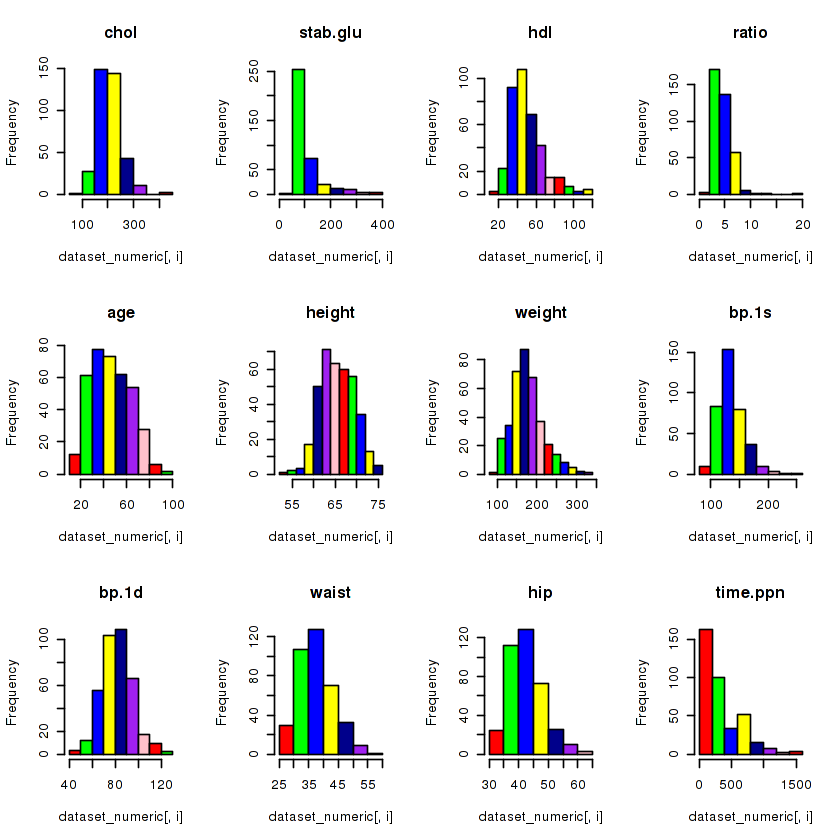

In [26]:

# Data visualizations %%%%%%
dataset_numeric = dataset[,-c(5,7,10)]
#Histograms
colors=c("red","green","blue","yellow","darkblue","purple","pink")
par(mfrow=c(3,4)) # put four figures in a row (2*4)
for (i in 1:12) {
  hist(dataset_numeric[,i],main=names(dataset_numeric)[i],col=colors)
}


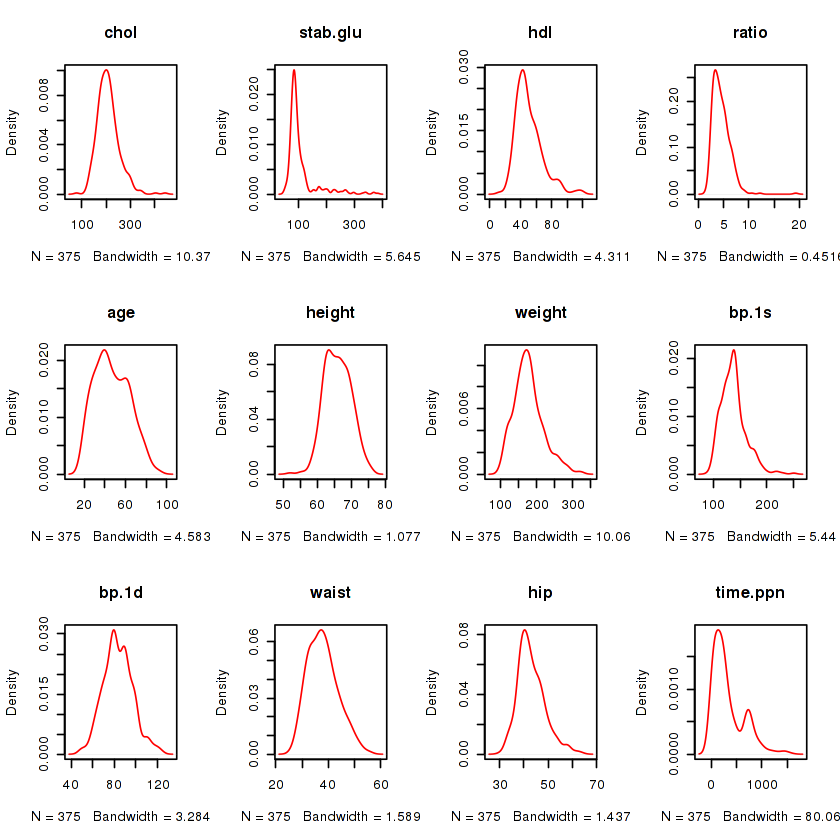

In [28]:
#Density Plots
colors=c("red")
par(mfrow=c(3,4))
for(i in 1:12) {
  plot(density(dataset_numeric[,i]), main=names(dataset_numeric)[i],col=colors)
}


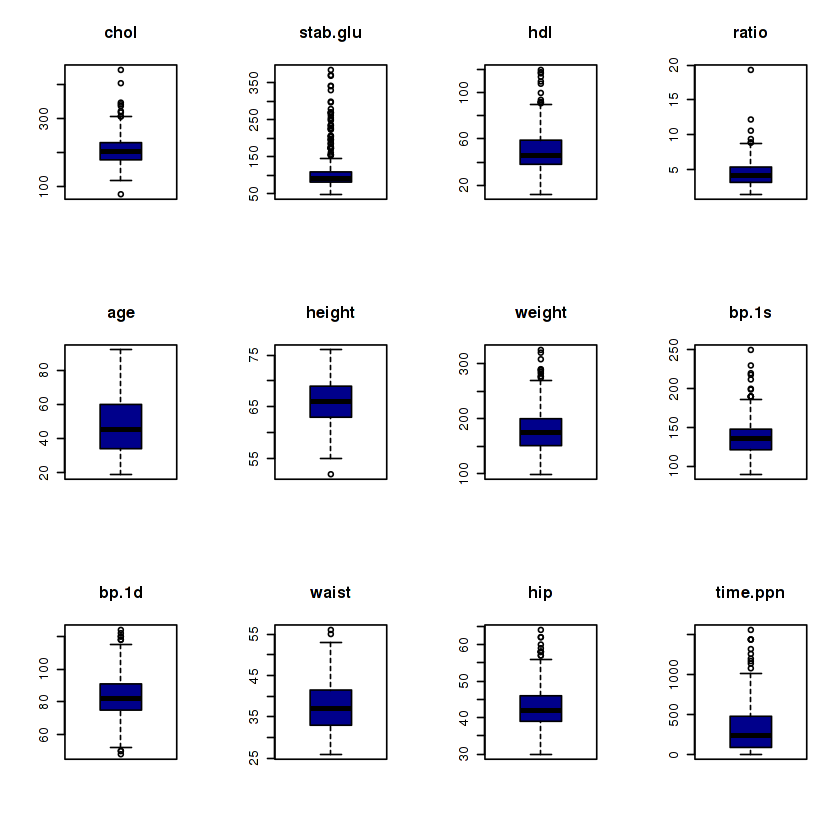

In [29]:
#Box And Whisker Plots
color=c("darkblue")
par(mfrow=c(3,4))
for(i in 1:12) {
  boxplot(dataset_numeric[,i], main=names(dataset_numeric)[i],col=color)
}


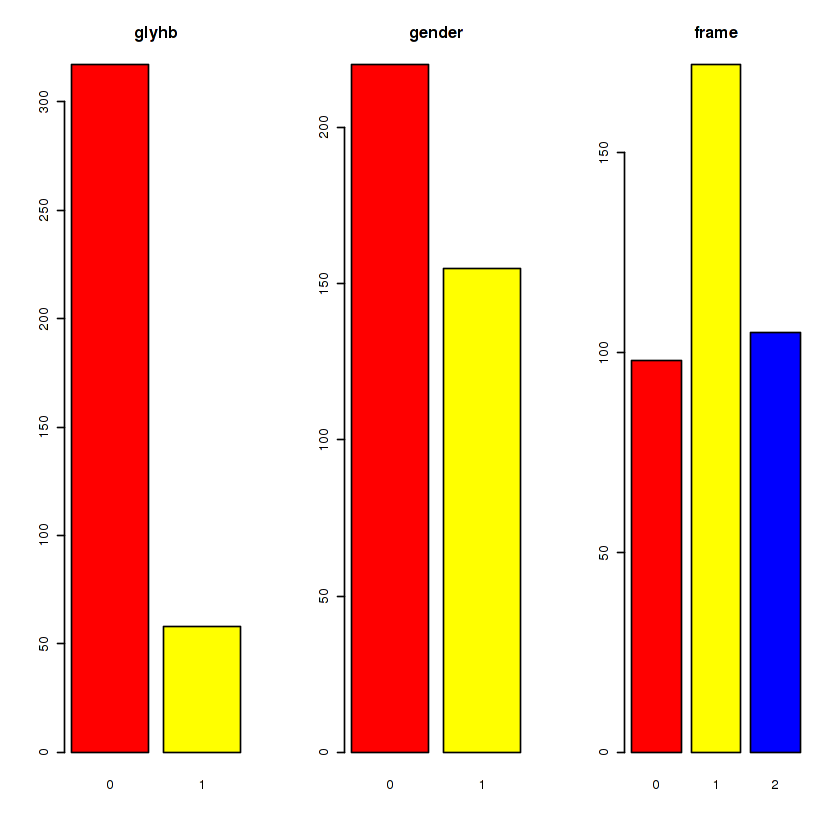

In [31]:
#Barplots, which is used to count the accurances for categorical attributes 
colors=c("red","yellow","blue","pink","purple")
dataset_categorical = dataset[,c(5,7,10)]
par(mfrow=c(1,3))
for(i in 1:3) {
  counts <- table(dataset_categorical[,i]) # get the count for each categorical value
  name <- names(dataset_categorical)[i]
  barplot(counts, main=name,col=colors)
}


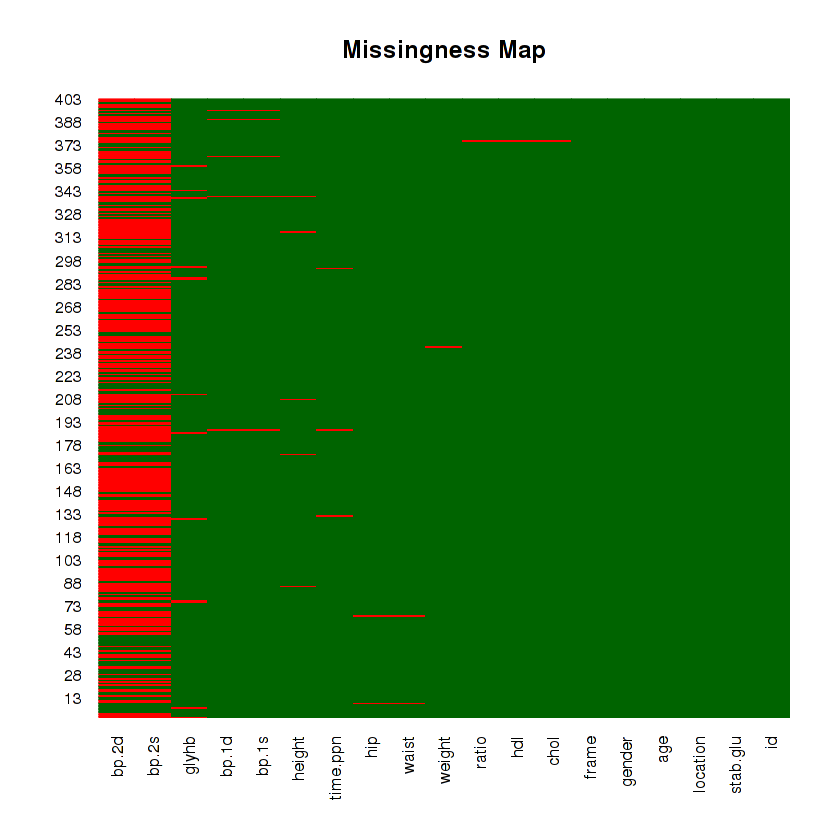

In [34]:
#Missing data Plot
library(Amelia) # library for the function missmap
par(mfrow=c(1,1))
missmap(datasetRaw, col=c("red", "darkgreen"), legend=FALSE)



                  chol    stab.glu         hdl       ratio         age
chol      1.0000000000  0.17605760  0.18918622  0.47685119  0.25807515
stab.glu  0.1760576046  1.00000000 -0.15845068  0.29353513  0.28820616
hdl       0.1891862222 -0.15845068  1.00000000 -0.68325757  0.02624555
ratio     0.4768511857  0.29353513 -0.68325757  1.00000000  0.16952389
age       0.2580751516  0.28820616  0.02624555  0.16952389  1.00000000
height   -0.0726825795  0.08643024 -0.09014271  0.07828072 -0.09530033
weight    0.0545001654  0.17918946 -0.29760400  0.27690932 -0.06523800
bp.1s     0.2084006482  0.16181629  0.03436444  0.11090086  0.45236549
bp.1d     0.1715635556  0.02867443  0.07630061  0.03904864  0.06562279
waist     0.1192740454  0.22720469 -0.28499211  0.30894469  0.15068806
hip       0.0732717715  0.13333204 -0.23280194  0.20246310 -0.00208207
time.ppn  0.0009236077 -0.05010410  0.06822885 -0.05007620 -0.03962976
                height      weight       bp.1s       bp.1d       waist
chol  

ERROR: Error in symbols(Pos, add = TRUE, inches = FALSE, circles = 0.9 * abs(DAT)^0.5/2, : invalid color name 'pulple'


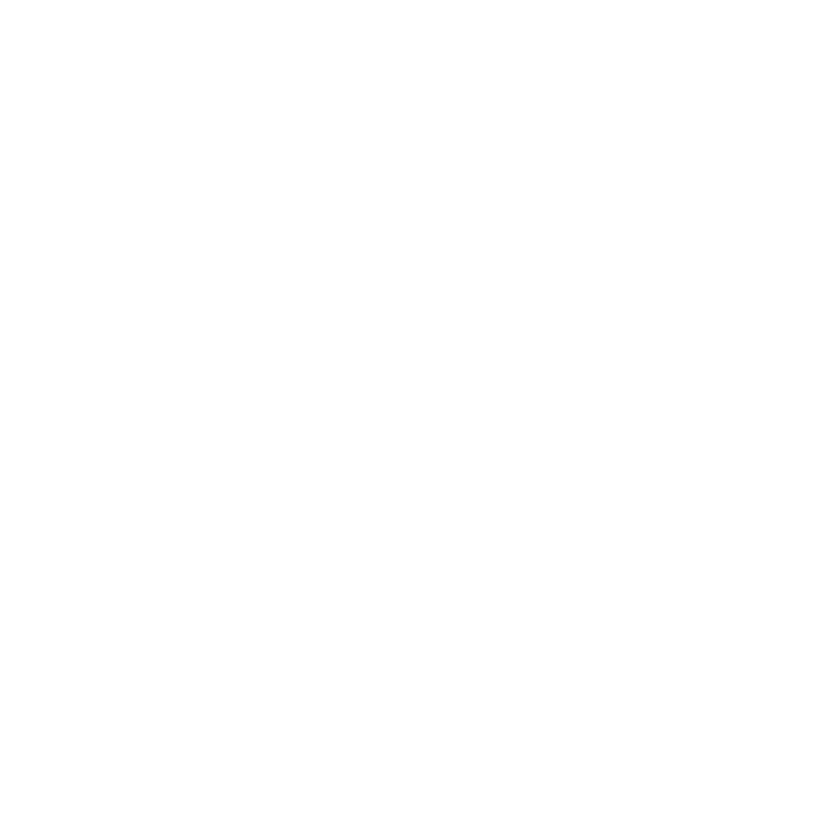

In [53]:
#Multivariate Visualization 
library(corrplot) # for function corrplot()
correlations1=cor(dataset_numeric)
print(correlations1)
par(mfrow=c(1,1))
corrplot(correlations1, methods="circle",col=c("pink","pulple","hotpink","mediumvioletred"))



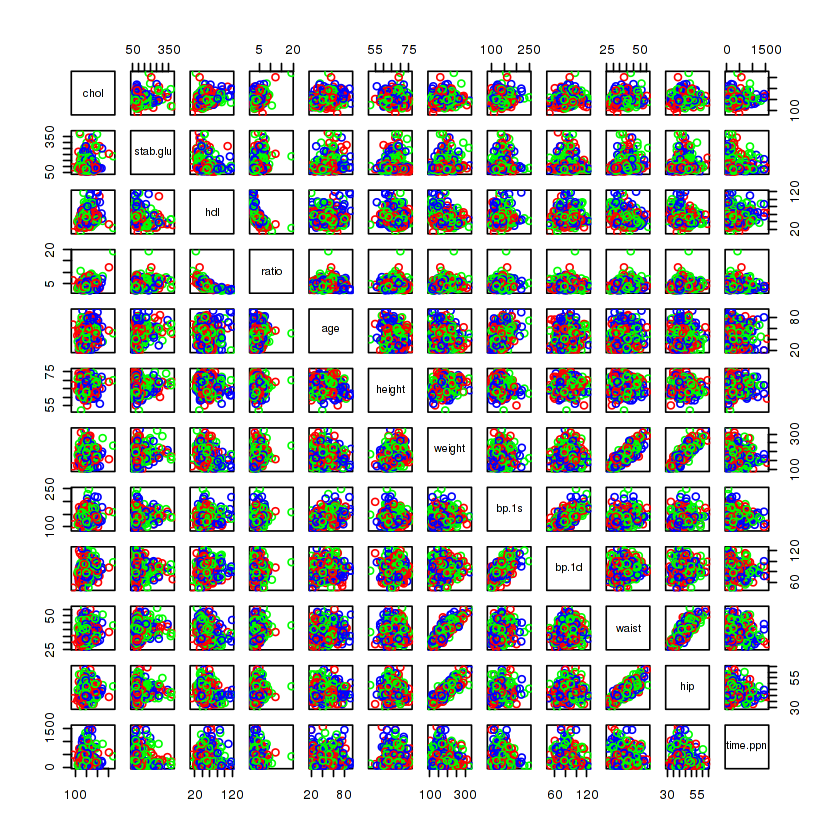

In [47]:
# pair-wise scatterplots of the numeric attributes
par(mfrow=c(1,1))
pairs(dataset_numeric,col=c("red","blue","green"))


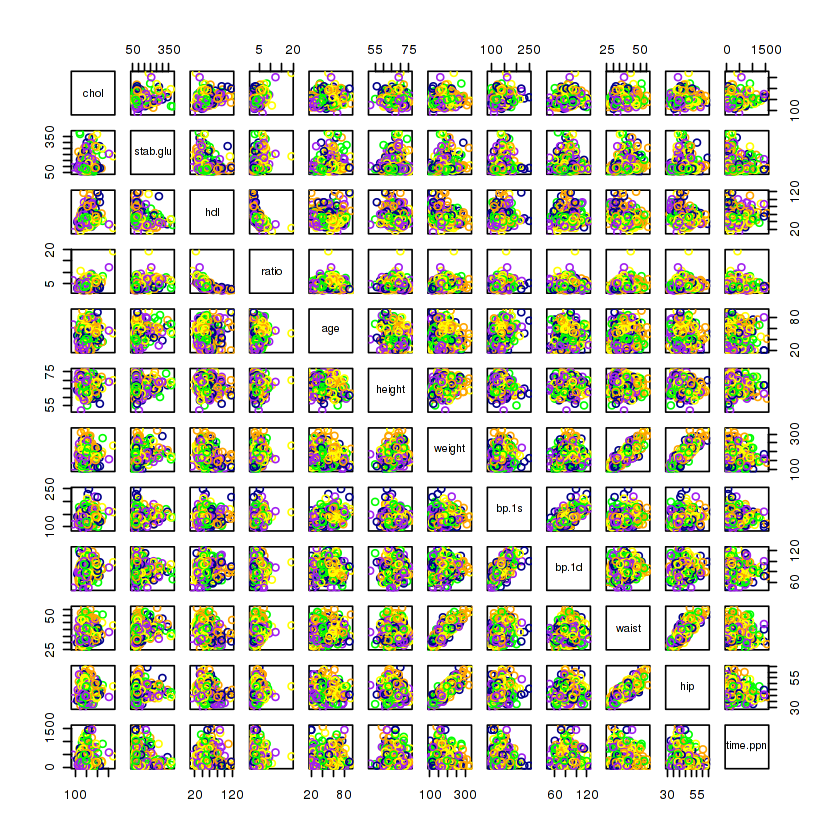

In [48]:
#Scatterplot Matrix By Class (use different color to distinguish different class)
par(mfrow=c(1,1))
pairs(dataset_numeric, col=c("darkblue","yellow","orange","purple","green"))

 

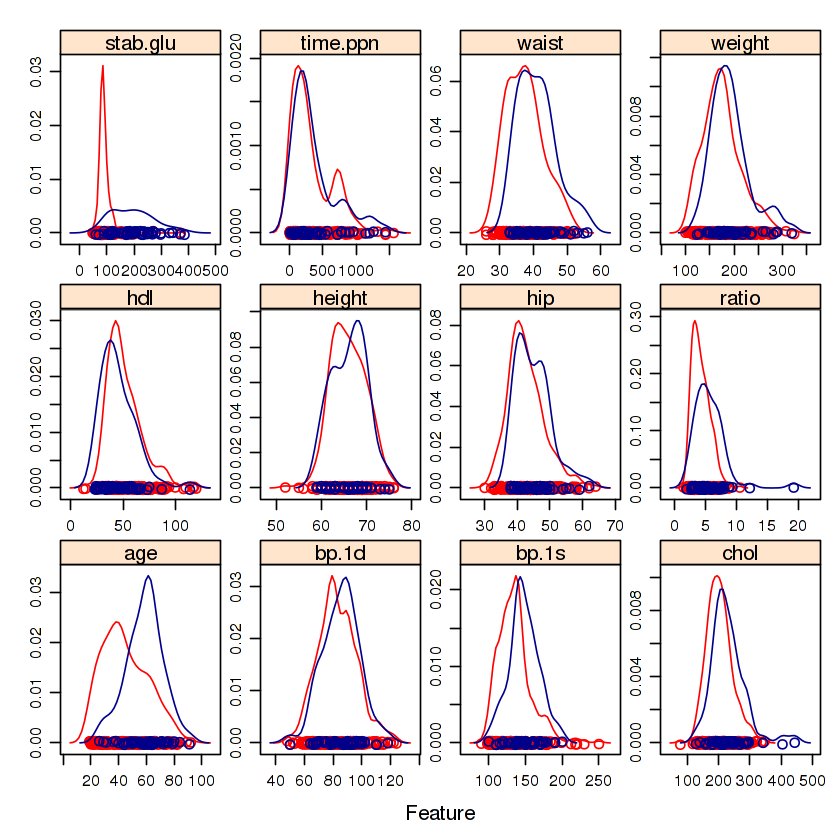

In [42]:
#Density By Class
library(caret)
# load the data
data(iris)
# density plots for each attribute by class value
x <- dataset_numeric
y <- dataset[,5]
scales <- list(x=list(relation="free"), y=list(relation="free"))
par(mfrow=c(1,1))
featurePlot(x=dataset_numeric, y=dataset[,5], plot="density", scales=scales,col=c("red","darkblue"))


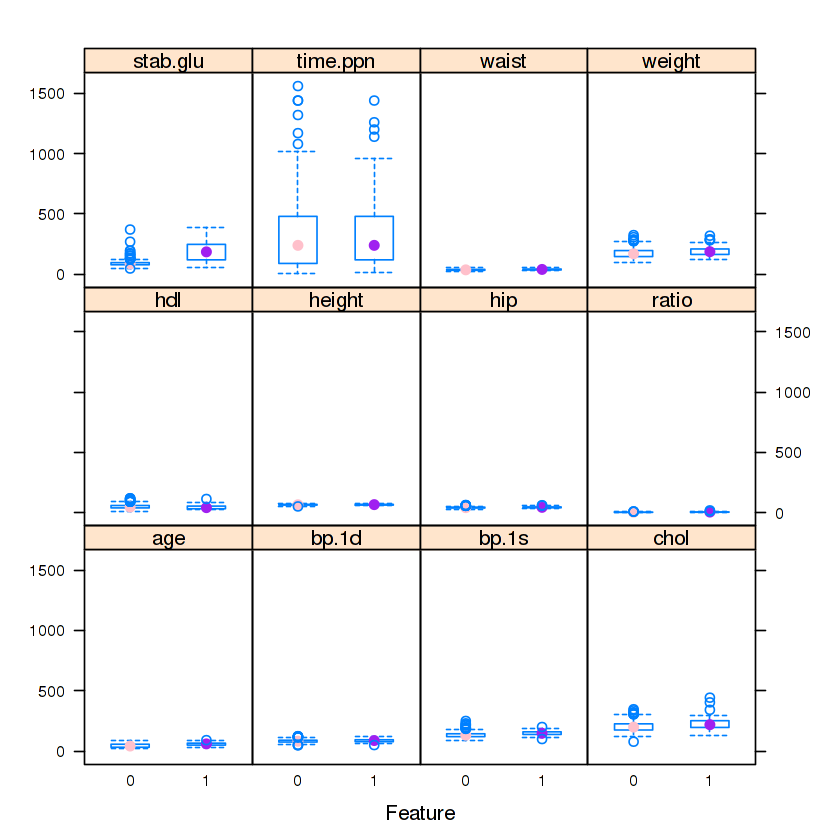

In [43]:
#Box And Whisker Plots By Class
featurePlot(x=dataset_numeric, y=dataset[,5], plot="box",col=c("pink","purple"))